In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px


In [ ]:
#goals

#conduct explatory data analysis on our data sets
#visualize location data
#aggregate categorical data
#summarise numerical data

In [2]:
df = pd.read_csv('Data/mexicoDataSets.csv')
df

,property_type,state,lat,lon,area_m2,price_usd
0,house,Estado de México,19.560181,-99.233528,150,67965.56
1,house,Nuevo León,25.688436,-100.198807,186,63223.78
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80
4,house,Yucatán,21.052583,-89.538639,205,105191.37
...,...,...,...,...,...,...
1731,house,Jalisco,20.532264,-103.484418,175,121178.91
1732,house,Morelos,18.928986,-99.180215,100,47417.83
1733,house,Yucatán,21.028404,-89.653006,81,39524.23
1734,house,San Luis Potosí,22.118304,-101.032194,360,245050.24


In [4]:
df.shape

(1736, 6)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1736 non-null   object 
 1   state          1736 non-null   object 
 2   lat            1736 non-null   float64
 3   lon            1736 non-null   float64
 4   area_m2        1736 non-null   int64  
 5   price_usd      1736 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 81.5+ KB


location data unpacking

In [3]:
fig = px.scatter_mapbox(
    df,
    lat ="lat",
    lon = "lon",
    center= {
        "lat": 19.43,
        "lon": -99.13,
    }, #the map to be centred on mexico city
    width = 600, #width of the map
    height = 600, #height of the map
    hover_data = ["price_usd"], #display price when hovering over house
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()



categorical data: 'state'

In [5]:
df["state"].head()

0    Estado de México
1          Nuevo León
2            Guerrero
3            Guerrero
4             Yucatán
Name: state, dtype: object

In [12]:
df["state"].nunique() #number of unique values on the column
#there are 30 states represented in our data sets

30

In [13]:
#the states are
df["state"].unique()

array(['Estado de México', 'Nuevo León', 'Guerrero', 'Yucatán',
       'Querétaro', 'Morelos', 'Chiapas', 'Tabasco', 'Distrito Federal',
       'Nayarit', 'Puebla', 'Veracruz de Ignacio de la Llave', 'Sinaloa',
       'Tamaulipas', 'Jalisco', 'San Luis Potosí', 'Baja California',
       'Hidalgo', 'Quintana Roo', 'Sonora', 'Chihuahua',
       'Baja California Sur', 'Zacatecas', 'Aguascalientes', 'Guanajuato',
       'Durango', 'Tlaxcala', 'Colima', 'Oaxaca', 'Campeche'],
      dtype=object)

In [16]:
#where are most of our properties located
#the states are
df["state"].value_counts().head(10)

state
Distrito Federal                   303
Estado de México                   179
Yucatán                            171
Morelos                            160
Querétaro                          128
Veracruz de Ignacio de la Llave    117
Puebla                              95
Nuevo León                          83
Jalisco                             60
Chiapas                             55
Name: count, dtype: int64

Numerical data: "area_m2" and "price_usd"

In [20]:
df[["area_m2","price_usd"]]. head(5)

,area_m2,price_usd
0,150,67965.56
1,186,63223.78
2,82,84298.37
3,150,94308.80
4,205,105191.37


In [21]:
df[["area_m2","price_usd"]]. describe()

,area_m2,price_usd
count,1736.000000,1736.000000
mean,170.261521,115331.980766
std,80.594539,65426.173873
min,60.000000,33157.890000
25%,101.750000,65789.470000
50%,156.000000,99262.130000
75%,220.000000,150846.665000
max,385.000000,326733.660000


plotting using histogram

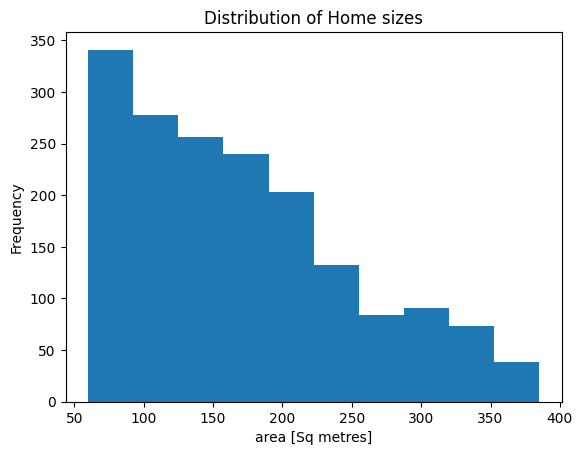

In [10]:
#semicolon at the end removes the plotting data sets
plt.hist(df["area_m2"])
plt.xlabel("area [Sq metres]")
plt.ylabel("Frequency")
plt.title("Distribution of Home sizes"); 

horzontal box plot

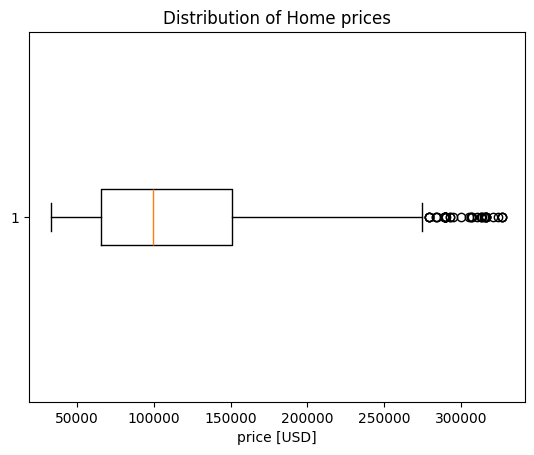

In [4]:
plt.boxplot(df["price_usd"], vert=False)
plt.xlabel("price [USD]")
plt.title("Distribution of Home prices");